In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from nn.activation_functions import *
from nn.layers import Dense, InLayer
from nn.nets import Net
from nn.cost_functions import *

In [2]:
l0 = InLayer(units=784)
l1 = Dense(units=15, activation=ReLU)
l2 = Dense(units=15, activation=ReLU)
l3 = Dense(units=10, activation=softmax)

In [ ]:
net = Net([
    InLayer(units=784),
    Dense(units=15, activation=ReLU),
    Dense(units=15, activation=ReLU),
    Dense(units=10, activation=softmax),
    ], cost_function=CrossEntropyLoss)

In [4]:
net.save_model('nn/model')

In [5]:
net2 = Net.load_model('nn/model.npz')

In [6]:
net2.layers[2].W.shape

(15, 15)

In [2]:
from keras.datasets import mnist

(X_train_og, Y_label), (X_test, Y_test_label) = mnist.load_data()
# Convert to 2d arrays rather than 3d
X_train = np.reshape(X_train_og, (X_train_og.shape[0], X_train_og.shape[1]*X_train_og.shape[2])) /255
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2])) /255

Y_train = np.eye(10)[Y_label]
Y_test = np.eye(10)[Y_test_label]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
# print(X_train[0:3,0:5])
# print(Y_train[0:10])

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [8]:
# X_train = np.array([[-2, -2],
#                      [-1,  -2],
#                      [0,  0],
#                      [2, 2],
#                      [3, -3],
#                      [-2, 2],
#                      [2, 5],
#                      [4, 4]])
                     
# Y_train = np.sum(X_train**2, axis=1)+2 # y = x1*3 + x2*3 + 2
# # Y_train[0] = -10
# print(X_train,'\n\n', Y_train)

# Y_train = np.reshape(Y_train, (-1, 1))

In [9]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d') # or ax = plt.axes(projection='3d')
# ax.scatter3D(X_train[:,0], X_train[:,1], Y_train.reshape((-1)))
# ax.scatter3D(X_train[:,0], X_train[:,1], net.predict(X_train).reshape((-1)))

In [10]:
net.compute_cost(X_train, Y_train) # very high

np.float64(4.710751838247359)

In [11]:
net.compute_accuracy(X_train, Y_train)

np.float64(0.0)

In [12]:
J_history = net.gradient_descent(X_train, Y_train, alpha=0.0005, epochs=5000, batch_size=256)

Initial cost   : Cost 4.710752
Epoch         0: Cost 4.087983
Epoch       500: Cost 1.072265
Epoch      1000: Cost 0.746837
Epoch      1500: Cost 0.618283
Epoch      2000: Cost 0.547771
Epoch      2500: Cost 0.502870
Epoch      3000: Cost 0.471650
Epoch      3500: Cost 0.448801
Epoch      4000: Cost 0.432169
Epoch      4500: Cost 0.421338
Epoch      4999: Cost 0.417379


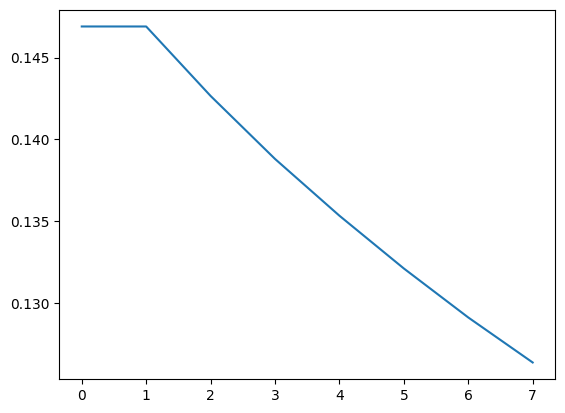

In [48]:
plt.plot(J_history[:])

In [14]:
net.compute_cost(X_train, Y_train) # near 0

np.float64(0.4173786014548684)

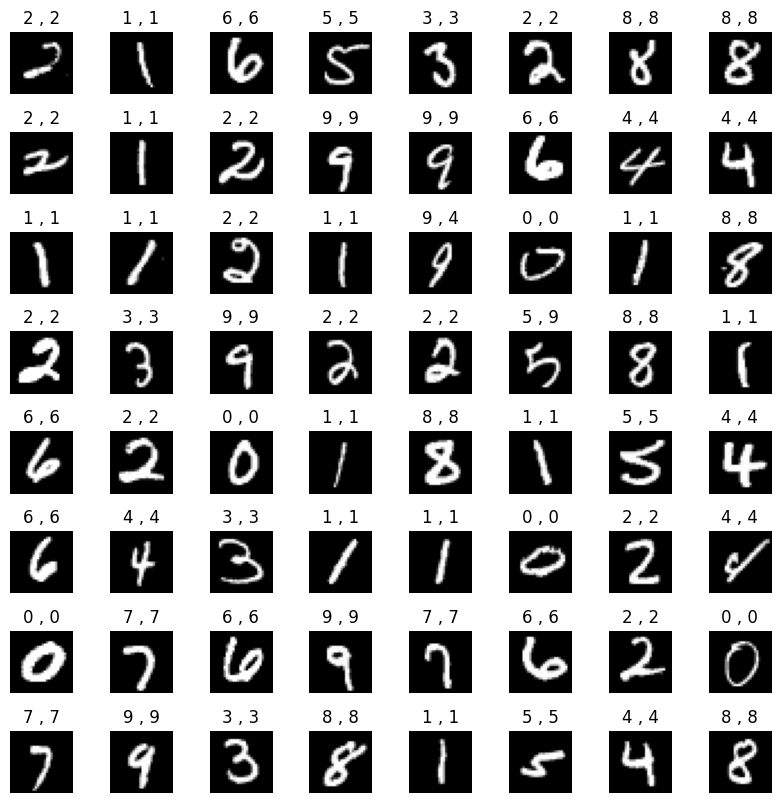

In [59]:
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(10000)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image

    ax.imshow(X_random_reshaped, cmap='gray')
    y_pred = net2.predict(X_random_reshaped.reshape((1, 784)))
    y_pred_label = np.argmax(y_pred, axis=1)
    
    
    # Display the label above the image
    ax.set_title(f'{Y_test_label[random_index]} , {y_pred_label[0]}')
    ax.set_axis_off()

In [19]:
net.compute_accuracy(X_train, Y_train)

np.float64(0.08225)

In [60]:
net2.save_model('nn/model')

In [3]:
net2 = Net.load_model('nn/model.npz')

In [53]:
net2.compute_cost(X_train, Y_train)

np.float64(0.1262898661862749)

In [54]:
net2.compute_accuracy(X_train, Y_train)

np.float64(0.9630333333333333)

In [56]:
net2.compute_accuracy(X_test, Y_test)

np.float64(0.9547)

In [50]:
J_history = net2.gradient_descent(X_train, Y_train, alpha=0.00015, epochs=50000, batch_size=800)

Initial cost   : Cost 0.126352
Epoch         0: Cost 0.126352


KeyboardInterrupt: 

In [61]:
net3 = Net.load_model('nn/model.npz')

In [62]:
net3.compute_accuracy(X_train, Y_train)

np.float64(0.9630333333333333)